In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*台苯.txt")
    return files
textfile=textfile()
textfile

['./files\\20160217台苯.txt',
 './files\\20160309台苯.txt',
 './files\\20160314台苯.txt',
 './files\\20160322台苯.txt',
 './files\\20160401台苯.txt',
 './files\\20160411台苯.txt',
 './files\\20170921台苯.txt',
 './files\\20180327台苯.txt',
 './files\\20180622台苯.txt',
 './files\\20181029台苯.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['股東臨時會','智冠','大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.581 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '台灣',
 '之爭',
 '表示',
 '億元',
 '今年',
 '指出',
 '記者',
 '台紙',
 '智冠',
 '榮剛',
 '台苯',
 '遊戲',
 '目前',
 '去年']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['台苯大 股東 要換 掉 董座 林文淵 董事 長 林文淵 與 大 股東 孫鐵漢 反目 台苯將 日 召開 股東臨時會 全面 改選 董監 林文淵 董座 恐不保 本報 資料 照 友善 列印 小 字型 中 字型 大 字型 年月日 中國 時報 洪凱音 陳 宥 臻 台北 報導 董事 長 林文淵 與 大 股東 孫鐵漢 反目 台苯將 日 召開 股東臨時會 全面 改選 董監 林文淵 董座 恐不保 孫鐵漢 坦言 林文淵 是 透過 前民進 黨 祕 書長 吳乃仁 介紹 由 他聘 請 來 原本 美事 一樁 但 事後發 現林 文淵 行事 很 爭議 不 適任 董事 長 職務 強調 這次 改選絕 不再 支持 他 孫鐵漢 強調 自己 不會 挑大梁 擔任 台 苯 董事 長 最看 不慣 林文淵 坐領 高薪 新款 賓士車 代步 竟然 對外 以 文化大革命 方式 鬥臭 東家 指孫鐵漢 這樣 行徑 不僅 惡劣 不 光明磊落 且還 不合 職場 倫理 林文淵放話 孫鐵漢公開 向 林文淵 嗆 聲 敢不敢 公開 與 總經理 吳清典 對質 孫鐵漢 呼籲 要爭 經營權 應該 透過 公開 收購 方式 不該 像 名嘴 般亂 放話 高階 主管 林文淵 經營 企業 最大 爭議 是 無法 接受 專業 經理 相反 意見 會以 嚴厲 手段 處理 人事 問題 長 久 下來 會議 呈現 一言堂 現象 股權 結構 三分 天下 以 董監 席次 共有 席來 看 孫鐵漢 所 屬元捷 懷恩 裕捷 投資 占有 席 和 合國際 吳姓 家族 掌控 席 林文淵 也 控有 其餘席 孫鐵漢 坦言 屬意 董事 長 人選 但 因為 股權 結構 的關 係 屬意 人選 最後不見 得 能 真正 當選 但 只要 其他 團隊 經營 能力 最終 還是 會 支持 昨舉 辦開 工團 拜 林文淵 團拜 時公開 董事 任期 屆 滿 後 無意續 任 高階 主管 私下 林文淵 說 詞 聽 聽 就 好 不要 相信 據 了解 了 抗孫鐵漢 林文淵 已 引進 高雄陳家 龍嚴 集團 董事 長 李世聰 等力 挺 孫鐵漢 掌握 持股 逾 與 林文淵 掌握 雙方勢 均力 敵 但 在 國外 李世聰 透過 幕僚 近年 來 已 陸續 出 脫台 苯 股票 不 可能 介入 林文淵 孫鐵漢 經營權 中國 時報',
 '台苯委 託 書大戰開 打 兩派 登報 互槓 中央社 中央社 韋樞 台北 日電 爆出 經營權 再

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1464


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (10, 1464)


<10x1464 sparse matrix of type '<class 'numpy.float64'>'
	with 2069 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
一樁 0.0607544292875094 0 14
一言堂 0.0607544292875094 0 19
三分 0.0607544292875094 0 24
下來 0.0607544292875094 0 40
不僅 0.0607544292875094 0 45
不再 0.05164681541773747 0 46
不合 0.05164681541773747 0 49
不慣 0.0607544292875094 0 55
不會 0.05164681541773747 0 58
不要 0.0607544292875094 0 66
不該 0.0607544292875094 0 68
且還 0.0607544292875094 0 73
中國 0.09036972107973035 0 83
主管 0.1215088585750188 0 93
了解 0.05164681541773747 0 101
事後發 0.0607544292875094 0 107
人事 0.0607544292875094 0 123
人選 0.1215088585750188 0 132
介入 0.0607544292875094 0 138
介紹 0.0607544292875094 0 139
他聘 0.0607544292875094 0 141
代步 0.0607544292875094 0 143
任期 0.0607544292875094 0 155
倫理 0.0607544292875094 0 188
光明磊落 0.0607544292875094 0 199
全面 0.10329363083547494 0 212
公開 0.1215088585750188 0 225
共有 0.0607544292875094 0 227
其餘席 0.0607544292875094 0 233
列印 0.05164681541773747 0 251
前民進 0.0607544292875094 0 266
占有 0.0607544292875094 0 286
友善 0.0607544292875094 0 300
反目 0.1215088585750188 0 304
只要 0.05164681541773747 0 317
召

昨再 0.06424547768953538 3 808
會忠 0.06424547768953538 3 837
東孫鐵漢 0.06424547768953538 3 867
林文淵 0.26016739200841144 3 870
林文淵除 0.06424547768953538 3 877
林派 0.12849095537907076 3 880
正軌 0.06424547768953538 3 905
此舉 0.05461452550156656 3 908
步入 0.06424547768953538 3 909
決定 0.05461452550156656 3 926
汽電 0.05461452550156656 3 929
海嘯 0.06424547768953538 3 943
營運 0.05461452550156656 3 979
爆發 0.05461452550156656 3 983
生產 0.05461452550156656 3 1011
由大股 0.06424547768953538 3 1014
發出 0.06424547768953538 3 1032
發難 0.06424547768953538 3 1040
眼睜睜 0.06424547768953538 3 1064
社會責任 0.05461452550156656 3 1074
符合 0.06424547768953538 3 1089
等待 0.06424547768953538 3 1096
精神 0.06424547768953538 3 1104
結果將 0.06424547768953538 3 1115
經營 0.05203347840168229 3 1122
經營權 0.05203347840168229 3 1123
績效 0.05461452550156656 3 1135
聲明 0.06424547768953538 3 1148
聲明還 0.06424547768953538 3 1149
職務 0.3276871530093994 3 1151
職守 0.06424547768953538 3 1153
股東會 0.07630060797953578 3 1159
臨時 0.08496192142527964 3 1172
自然人 0.064245

自己 0.0799150039680153 6 1175
董事 0.3234144489136024 6 1196
董監 0.11987250595202296 6 1198
蓄勢 0.06728881643856982 6 1200
行情 0.05720164147760857 6 1213
表達 0.06728881643856982 6 1217
規劃 0.06728881643856982 6 1226
走堅 0.06728881643856982 6 1294
趨緩 0.06728881643856982 6 1298
近年 0.05720164147760857 6 1307
這次 0.05720164147760857 6 1319
還將 0.06728881643856982 6 1359
配發 0.06728881643856982 6 1366
重回 0.13457763287713964 6 1370
鐵漢出 0.06728881643856982 6 1382
關注 0.06728881643856982 6 1395
雖因 0.06728881643856982 6 1410
青及 0.06728881643856982 6 1419
青擔 0.06728881643856982 6 1421
順勢 0.06728881643856982 6 1433
----Document 7----
一刀 0.08603088346315282 7 1
下台 0.12904632519472925 7 42
不平 0.08603088346315282 7 53
不知 0.08603088346315282 7 62
企業 0.2559874438415502 7 157
但是 0.17206176692630565 7 163
動議 0.08603088346315282 7 275
取代 0.08603088346315282 7 306
只好 0.08603088346315282 7 315
只是 0.07313411072334484 7 316
台苯經 0.0692757099983338 7 332
台苯關 0.07313411072334484 7 334
吳乃仁會 0.08603088346315282 7 354
吳乃仁要 0.0

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files\20160217台苯.txt,./files\20160309台苯.txt,./files\20160314台苯.txt,./files\20160322台苯.txt,./files\20160401台苯.txt,./files\20160411台苯.txt,./files\20170921台苯.txt,./files\20180327台苯.txt,./files\20180622台苯.txt,./files\20181029台苯.txt
0,一人主導,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067289,0.000000,0.000000,0.000000
1,一刀,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086031,0.000000,0.000000
2,一切,0.000000,0.000000,0.000000,0.064245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,一切都是,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043015,0.000000,0.000000
4,一同,0.000000,0.000000,0.000000,0.000000,0.000000,0.026389,0.000000,0.000000,0.000000,0.000000
5,一名,0.000000,0.000000,0.044443,0.000000,0.000000,0.044866,0.000000,0.000000,0.000000,0.000000
6,一大,0.000000,0.000000,0.000000,0.000000,0.051947,0.000000,0.000000,0.000000,0.000000,0.000000
7,一奇襲,0.000000,0.000000,0.000000,0.000000,0.000000,0.026389,0.000000,0.000000,0.000000,0.000000
8,一套,0.000000,0.049764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一定,0.000000,0.000000,0.000000,0.054615,0.044159,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files\20160217台苯.txt,./files\20160309台苯.txt,./files\20160314台苯.txt,./files\20160322台苯.txt,./files\20160401台苯.txt,./files\20160411台苯.txt,./files\20170921台苯.txt,./files\20180327台苯.txt,./files\20180622台苯.txt,./files\20181029台苯.txt
0,一人主導,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067289,0.000000,0.000000,0.000000
1,一刀,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086031,0.000000,0.000000
2,一切,0.000000,0.000000,0.000000,0.064245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,一切都是,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043015,0.000000,0.000000
4,一同,0.000000,0.000000,0.000000,0.000000,0.000000,0.026389,0.000000,0.000000,0.000000,0.000000
5,一名,0.000000,0.000000,0.044443,0.000000,0.000000,0.044866,0.000000,0.000000,0.000000,0.000000
6,一大,0.000000,0.000000,0.000000,0.000000,0.051947,0.000000,0.000000,0.000000,0.000000,0.000000
7,一奇襲,0.000000,0.000000,0.000000,0.000000,0.000000,0.026389,0.000000,0.000000,0.000000,0.000000
8,一套,0.000000,0.049764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一定,0.000000,0.000000,0.000000,0.054615,0.044159,0.000000,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06075443],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.08603088, 0.        , ..., 0.08603088, 0.08603088,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一人主導,0,0,0,0,0,0,1,0,0,0
1,一刀,0,0,0,0,0,0,0,2,0,0
2,一切,0,0,0,1,0,0,0,0,0,0
3,一切都是,0,0,0,0,0,0,0,1,0,0
4,一同,0,0,0,0,0,1,0,0,0,0
5,一名,0,0,2,0,0,2,0,0,0,0
6,一大,0,0,0,0,1,0,0,0,0,0
7,一奇襲,0,0,0,0,0,1,0,0,0,0
8,一套,0,1,0,0,0,0,0,0,0,0
9,一定,0,0,0,1,1,0,0,0,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一人主導,0,0,0,0,0,0,1,0,0,0
1,一刀,0,0,0,0,0,0,0,2,0,0
2,一切,0,0,0,1,0,0,0,0,0,0
3,一切都是,0,0,0,0,0,0,0,1,0,0
4,一同,0,0,0,0,0,1,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一人主導,0,0,0,0,0,0,1,0,0,0
1,一刀,0,0,0,0,0,0,0,2,0,0
2,一切,0,0,0,1,0,0,0,0,0,0
3,一切都是,0,0,0,0,0,0,0,1,0,0
4,一同,0,0,0,0,0,1,0,0,0,0
5,一名,0,0,2,0,0,2,0,0,0,0
6,一大,0,0,0,0,1,0,0,0,0,0
7,一奇襲,0,0,0,0,0,1,0,0,0,0
8,一套,0,1,0,0,0,0,0,0,0,0
9,一定,0,0,0,1,1,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一人主導': 1,
 '一刀': 2,
 '一切': 1,
 '一切都是': 1,
 '一同': 1,
 '一名': 4,
 '一大': 1,
 '一奇襲': 1,
 '一套': 1,
 '一定': 2,
 '一家': 1,
 '一封信': 1,
 '一度': 2,
 '一日': 2,
 '一樁': 1,
 '一派': 1,
 '一種': 4,
 '一章': 1,
 '一職': 2,
 '一言堂': 1,
 '一貫': 1,
 '一起': 1,
 '一雙': 1,
 '丁守中': 4,
 '三分': 1,
 '三問': 1,
 '三年': 1,
 '三次': 1,
 '三票': 1,
 '三等': 1,
 '上下交征': 1,
 '上任': 2,
 '上午': 1,
 '上半年': 1,
 '上台': 1,
 '上市': 1,
 '上櫃': 1,
 '上次': 1,
 '上演': 2,
 '上班': 1,
 '下來': 1,
 '下六輕': 8,
 '下台': 3,
 '下景碩': 1,
 '不但': 1,
 '不僅': 1,
 '不再': 3,
 '不利': 1,
 '不受': 1,
 '不合': 2,
 '不堪': 1,
 '不宜': 2,
 '不實': 4,
 '不平': 2,
 '不得不': 1,
 '不慣': 1,
 '不擔': 1,
 '不是': 1,
 '不會': 2,
 '不法': 1,
 '不為': 1,
 '不然': 8,
 '不知': 2,
 '不給': 1,
 '不良': 1,
 '不行': 4,
 '不要': 1,
 '不覺': 8,
 '不該': 1,
 '不贏': 4,
 '不起': 1,
 '不進': 1,
 '不錯': 1,
 '且還': 1,
 '世代': 1,
 '並不缺': 1,
 '並以': 1,
 '並已': 1,
 '並惡意': 1,
 '並擴': 1,
 '並未': 1,
 '並說': 1,
 '並非': 1,
 '中國': 18,
 '中央社': 4,
 '中山': 1,
 '中心': 1,
 '中物': 1,
 '中痛': 1,
 '中鋼': 1,
 '主席': 1,
 '主持': 1,
 '主筆室': 2,
 '主管': 2,
 '主要': 2,
 '乃仁': 1,
 '之子': 1,
 '之後台': 1,


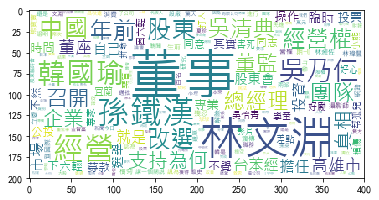

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [20]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('董事', 101),
 ('林文淵', 68),
 ('孫鐵漢', 30),
 ('經營', 27),
 ('韓國瑜', 24),
 ('吳乃仁', 20),
 ('中國', 18),
 ('股東', 18),
 ('年前', 16),
 ('改選', 16),
 ('經營權', 16),
 ('吳清典', 15),
 ('團隊', 15),
 ('召開', 14),
 ('總經理', 14),
 ('董監', 14),
 ('企業', 12),
 ('支持', 12),
 ('為何', 12),
 ('真相', 12),
 ('董座', 12),
 ('高雄市', 12),
 ('台苯經', 10),
 ('就是', 10),
 ('市場', 10),
 ('投資', 10),
 ('擔任', 10),
 ('股東會', 10),
 ('臨時', 10),
 ('自己', 10)]

In [21]:
data = []
for t in ten[:15]:
    data.append(t[1])
label = []
for t in ten[:15]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfb2f5c0>,
 <a list of 15 Text xticklabel objects>)

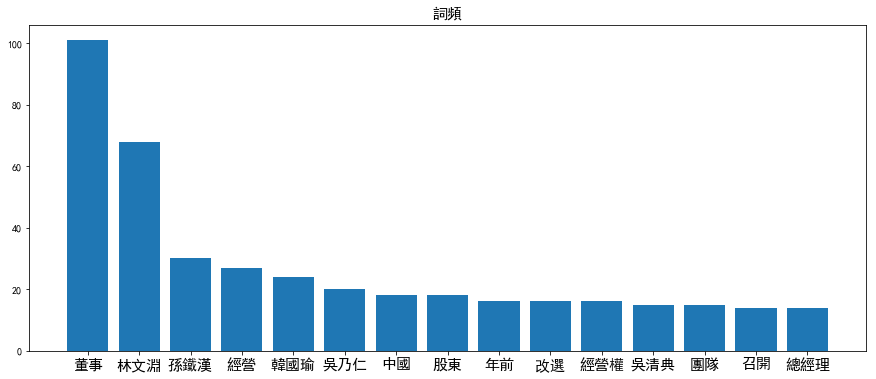

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,15),data)
plt.title("詞頻",fontsize=15)
plt.xticks(range(0,15),label,fontsize=15)

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.23599949, -0.11106034],
       [-0.18547002,  0.12504458],
       [ 0.80636207, -0.0424963 ],
       [-0.21282251, -0.15313627],
       [-0.23126049, -0.24905485],
       [ 0.82254285, -0.05141479],
       [-0.23247744, -0.19488578],
       [-0.16674427,  0.08523297],
       [-0.13127935,  0.88659177],
       [-0.23285135, -0.294821  ]])

No handles with labels found to put in legend.


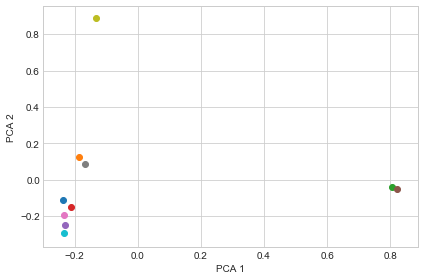

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

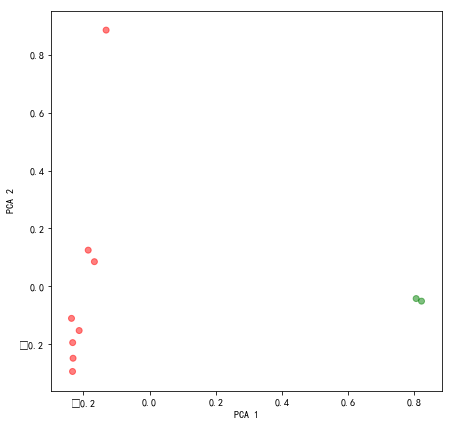

In [27]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()